In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
data = data.fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<AxesSubplot:>

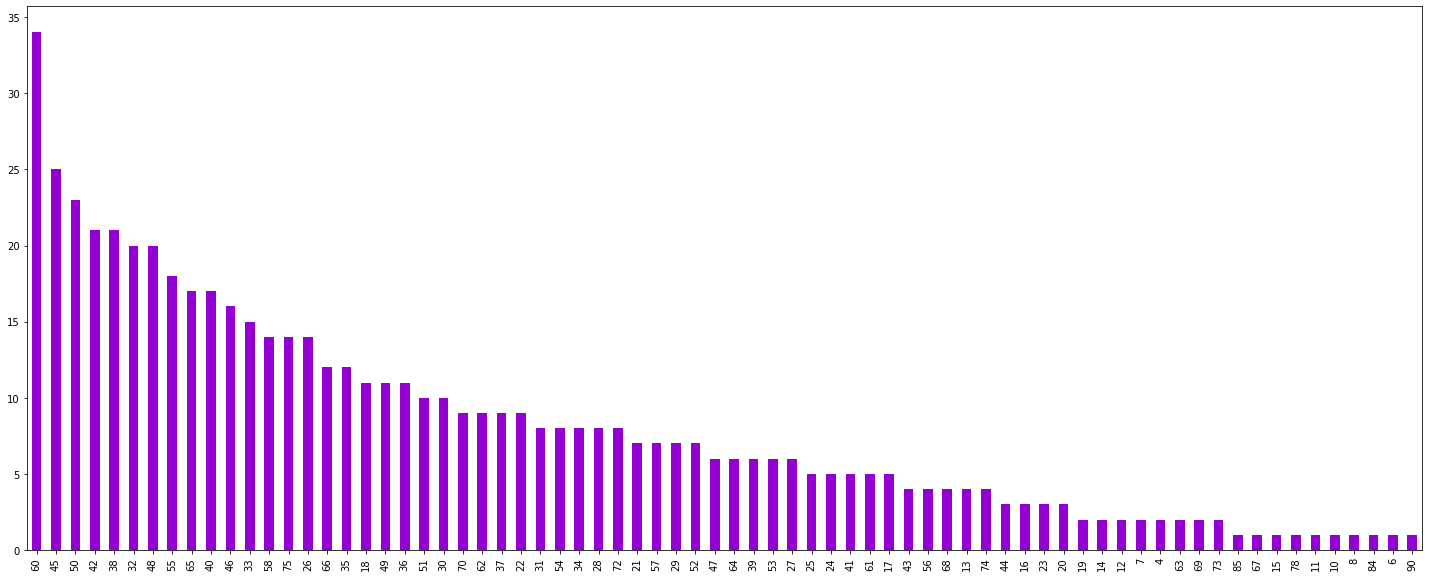

In [8]:
plt.figure(figsize=(25,10))
data['Age'].value_counts().plot.bar(color='darkviolet')

<AxesSubplot:>

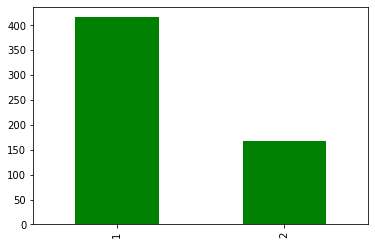

In [10]:
data['Dataset'].value_counts().plot.bar(color='green')

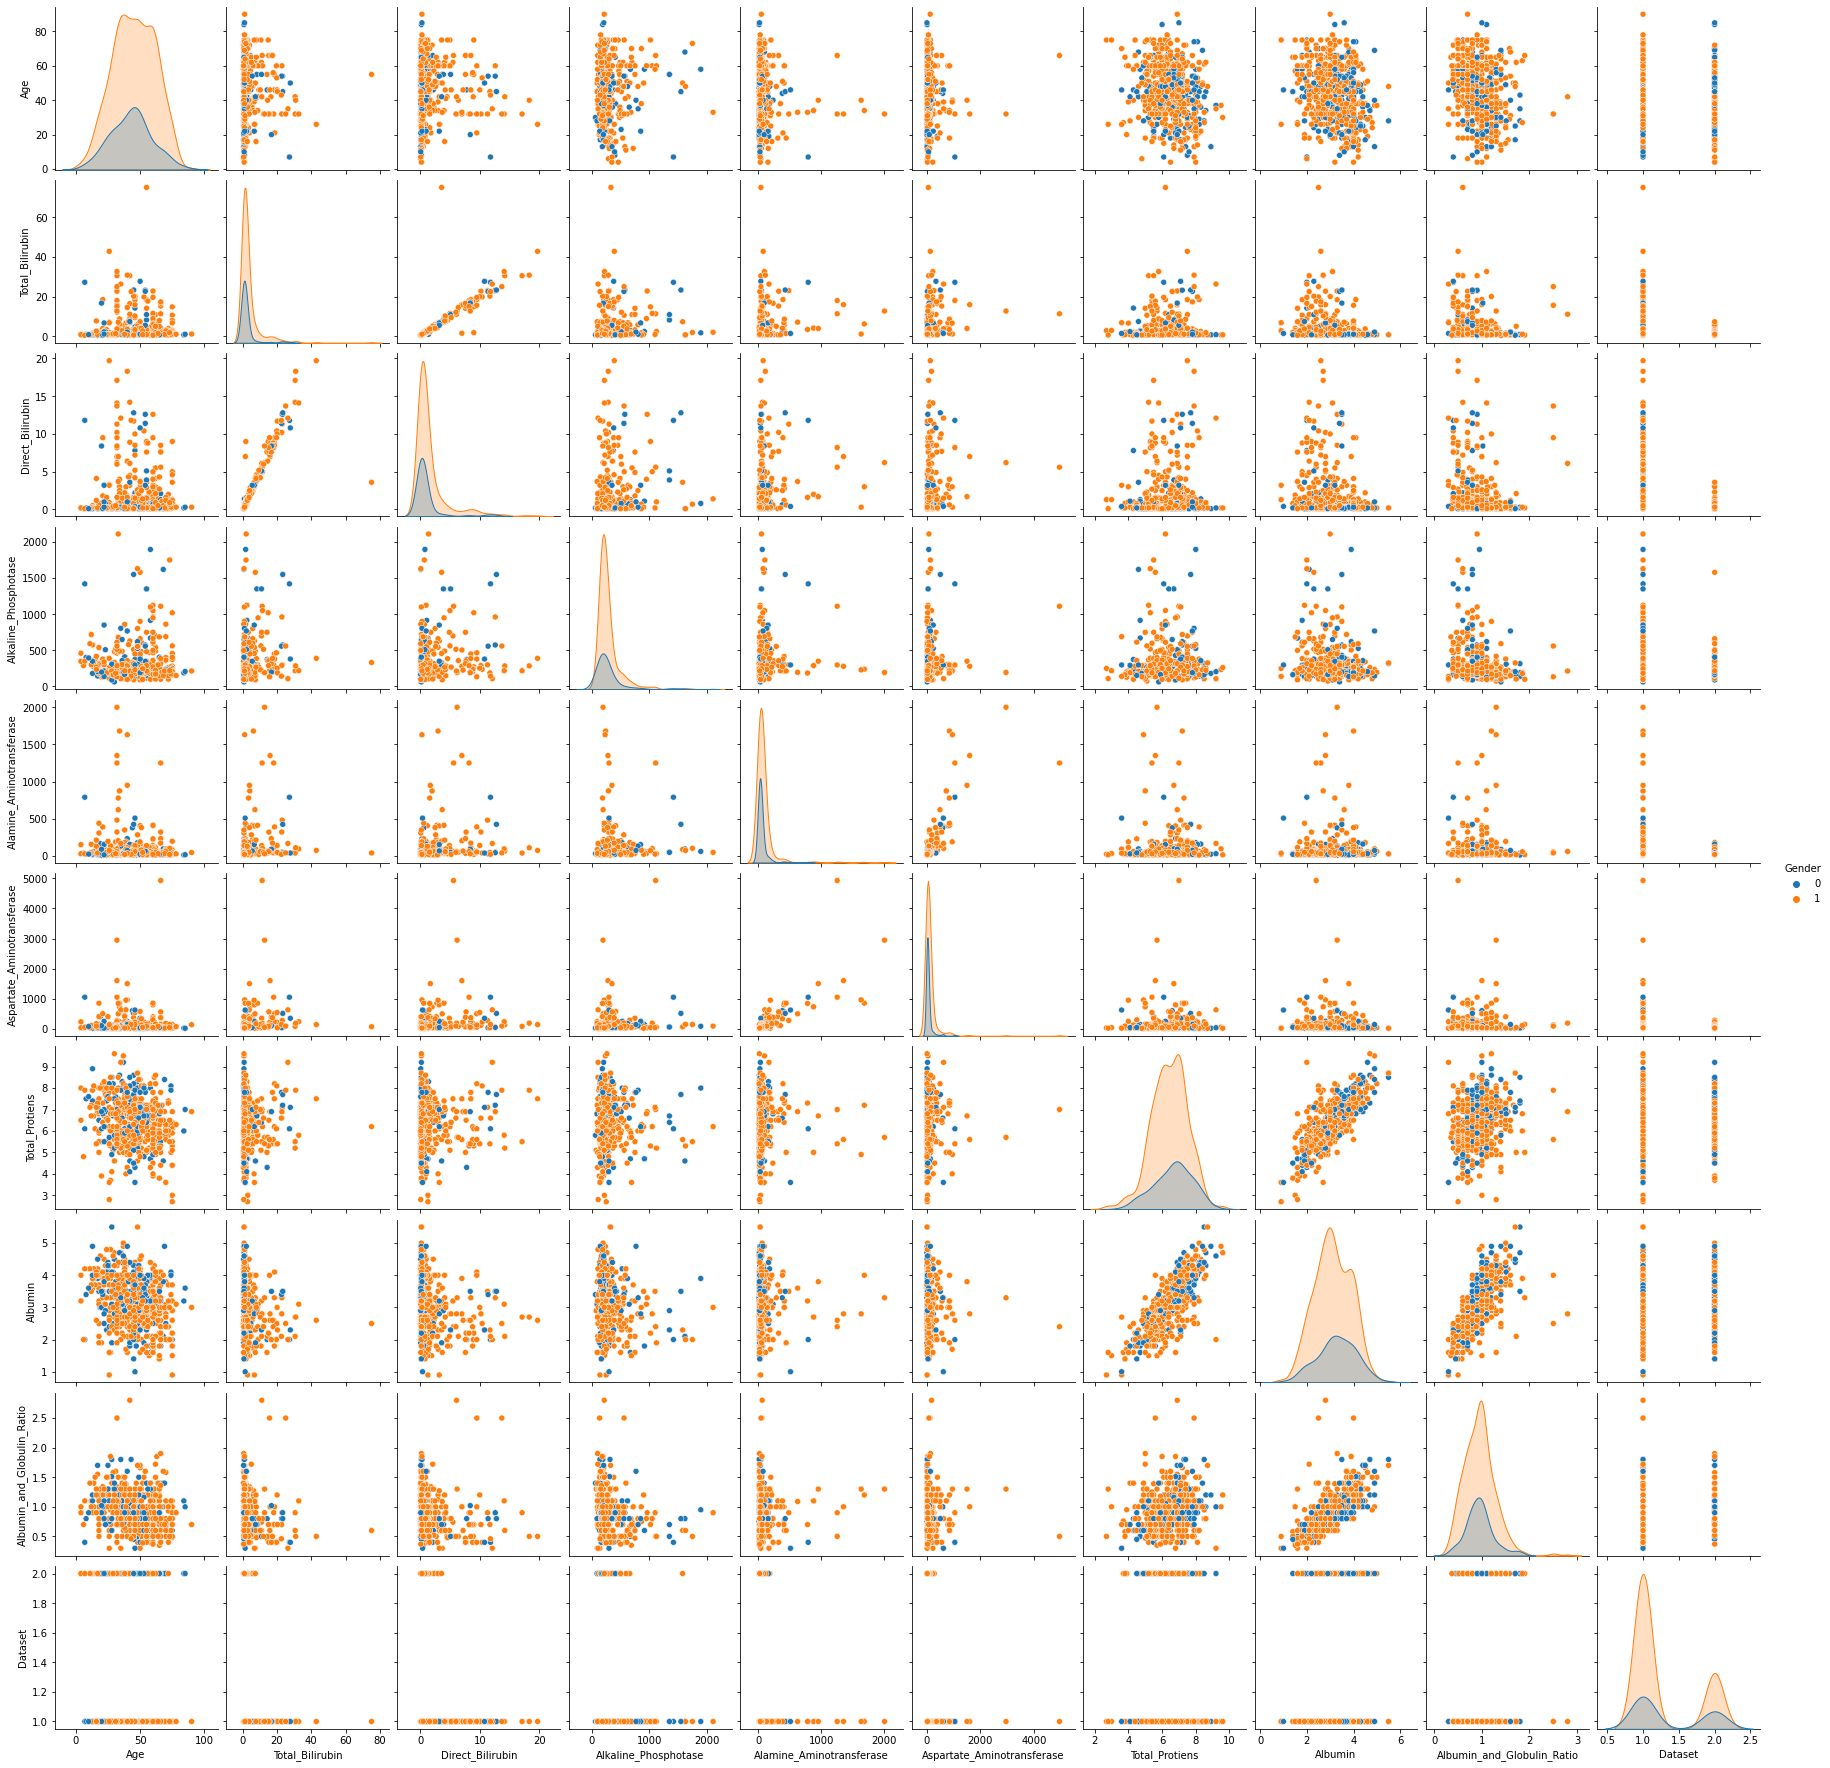

In [11]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(data,hue='Gender')

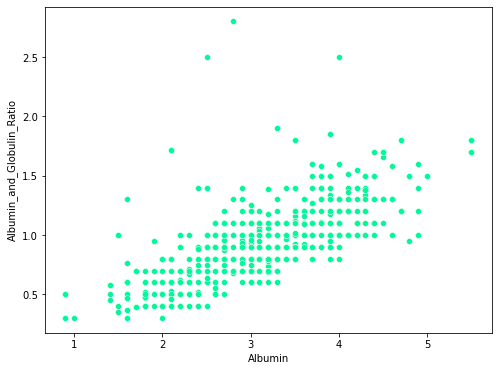

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=data);
plt.show()

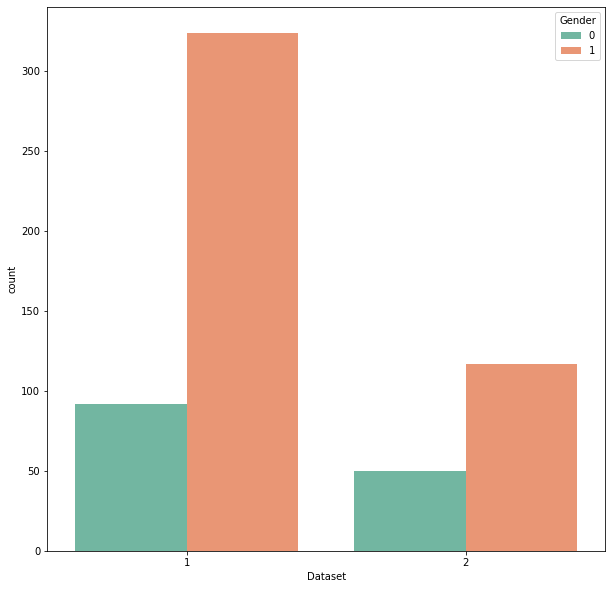

In [14]:
ax = sns.countplot(x="Dataset", hue="Gender", data=data, palette="Set2")

<AxesSubplot:>

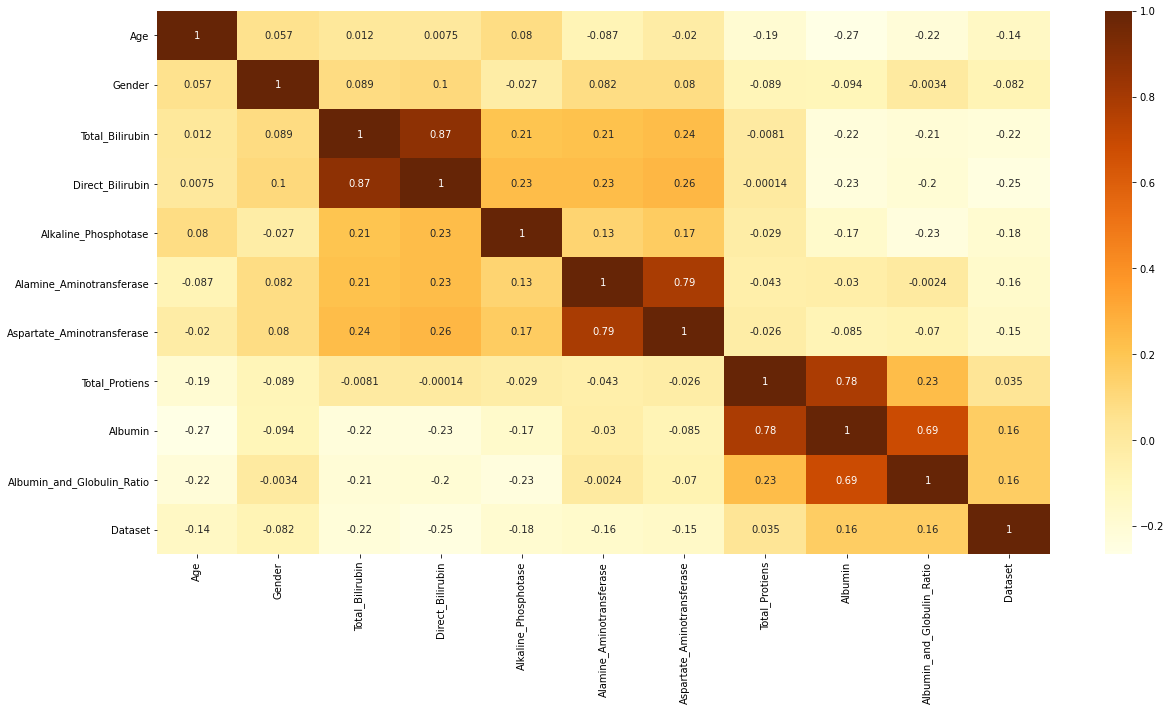

In [16]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='YlOrBr', annot=True)

## Training

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop(['Dataset'], axis=1)
y = data['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [20]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,random_state=42)
results = cross_val_score(model, X_train_scaled,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.72727273 0.73863636 0.72413793 0.66666667 0.75862069]
Accuracy: 72.30668756530825


### Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_param = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }

clf = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_param,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True)

clf.fit(X=X_train_scaled, y=y_train)
preds = clf.predict(X_test_scaled)
cfmatrix = confusion_matrix(
            y_true=y_test, y_pred=preds)
print("Grid Search Results of SVC Grid")
print("The best parameters are: ", clf.best_params_)
print("Best trainning accuracy: \t", clf.best_score_)
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=preds))

Grid Search Results of SVC Grid
The best parameters are:  {'C': 10, 'penalty': 'l2'}
Best trainning accuracy: 	 0.7391327063740857
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.94      0.82       100
           2       0.65      0.24      0.35        46

    accuracy                           0.72       146
   macro avg       0.69      0.59      0.59       146
weighted avg       0.70      0.72      0.67       146



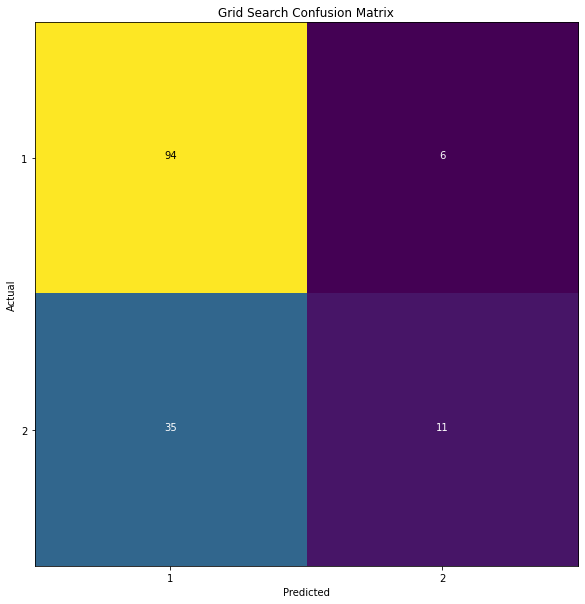

In [28]:
import itertools
plt.subplots()
classes=sorted(data['Dataset'].unique())
plt.imshow(cfmatrix, interpolation='nearest')
plt.title('Grid Search Confusion Matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = cfmatrix.mean()
for i, j in itertools.product(range(cfmatrix.shape[0]), range(cfmatrix.shape[1])):
        plt.text(j, i, format(cfmatrix[i, j]), 
                 horizontalalignment="center",
                 color="white" if cfmatrix[i, j] < thresh else "black")

In [30]:
# Show metrics 
def show_metrics():
    tp = cfmatrix[1,1]
    fn = cfmatrix[1,0]
    fp = cfmatrix[0,1]
    tn = cfmatrix[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
show_metrics()

Accuracy  =     0.719
Precision =     0.647
Recall    =     0.239
F1_score  =     0.349


## Saving and loading model

In [31]:
import pickle

filename = 'liver_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [32]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

0.7191780821917808
